# BDAT 1004 - Data Programming 
PROBLEM SET 3
>Student Number - 200465696

## Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [1]:
import pandas as pd

In [44]:
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep="|")
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [29]:
users.groupby(['occupation','age']).mean()


user_id
occupation    age            
administrator 21   118.000000
              22   259.666667
              23   474.000000
              25   595.000000
              26    82.000000
...                       ...
writer        50   637.500000
              51   548.000000
              52   381.000000
              56   558.000000
              60   464.000000

[429 rows x 1 columns]

In [169]:
male_ratio = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
denominator = male_ratio[['F','M']].sum(axis=1)
male_ratio['MaleRatio'] = round(100 * male_ratio['M'] / denominator)
male_ratio.sort_values(by="MaleRatio", ascending=False)

gender,F,M,MaleRatio
occupation,,,
doctor,0,7,100.0
engineer,2,65,97.0
technician,1,26,96.0
retired,1,13,93.0
executive,3,29,91.0
programmer,6,60,91.0
scientist,3,28,90.0
entertainment,2,16,89.0
lawyer,2,10,83.0


In [43]:
users.groupby('occupation').agg({'age': ['min', 'max']})

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [65]:
users.groupby(['occupation','gender']).agg({'age': 'mean'})

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [168]:
percentage = users.pivot_table(index='occupation', columns='gender',aggfunc='size', fill_value=0)
total_Value = percentage[['F','M']].sum(axis=1)
percentage['Male_Per'] = round(100 * percentage['M'] / total_Value)
percentage['Female_Per'] = round(100 * percentage['F'] / total_Value)
percentage[["Male_Per","Female_Per"]]

gender,Male_Per,Female_Per
occupation,,
administrator,54.0,46.0
artist,54.0,46.0
doctor,100.0,0.0
educator,73.0,27.0
engineer,97.0,3.0
entertainment,89.0,11.0
executive,91.0,9.0
healthcare,31.0,69.0
homemaker,14.0,86.0


## Question 2
Euro Teams

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goals
Step 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [78]:
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_&_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [97]:
euro12["Goals"]

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [89]:
print("Number of teams that participated are", euro12.shape[0])

Number of teams that participated are 16


In [90]:
print("Number of columns in the dataset are", euro12.shape[1])

Number of columns in the dataset are 35


In [94]:
discipline = euro12[["Team","Yellow Cards", "Red Cards"]]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [100]:
discipline.sort_values(["Red Cards", "Yellow Cards"], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [101]:
round(discipline["Yellow Cards"].mean())

7

In [112]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [113]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [114]:
euro12.index

RangeIndex(start=0, stop=16, step=1)

In [136]:
#euro12.iloc[0:7,0:7] 7 rows 7 columns
euro12.iloc[:,0:7] #all rows 7 columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [144]:
#euro12.iloc[0:7, :-3] 7 and all columns - last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [154]:
teams = euro12.loc[:,['Team','Shooting Accuracy']]
shooting_accuracy = teams.loc[[3,7,12]]
shooting_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 different Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299



In [155]:
import pandas as pd
import numpy as np

In [158]:
series1=pd.Series(np.random.randint(1,5,100))
series2=pd.Series(np.random.randint(1,4,100))
series3=pd.Series(np.random.randint(10000,30000,100))

In [171]:
#DataFrame by joining series by column where axis =1
Housing = pd.concat([series1,series2,series3], axis=1)
Housing.head()

,0,1,2
0,1,3,23367
1,4,3,21399
2,2,1,21906
3,1,1,18230
4,2,1,13744


In [164]:
Housing.columns= ['bedrs','bathrs','price_sqr_meter']
Housing.head()

,bedrs,bathrs,price_sqr_meter
0,1,3,23367
1,4,3,21399
2,2,1,21906
3,1,1,18230
4,2,1,13744


In [174]:
bigcolumn=pd.concat([series1,series2,series3],axis=0) #axis=0 since we have to put all values into one column so join by rows
bigcolumn

0         1
1         4
2         2
3         1
4         2
      ...  
95    25543
96    21113
97    17915
98    26658
99    17996
Length: 300, dtype: int32

In [ ]:
#Returned value is going till 99 only

In [177]:
bigcolumn.reset_index(drop=True,inplace=True)
bigcolumn

0          1
1          4
2          2
3          1
4          2
       ...  
295    25543
296    21113
297    17915
298    26658
299    17996
Length: 300, dtype: int32

## Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
>>>Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

>>The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks

In [331]:
import pandas as pd
from datetime import datetime

data = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep = '\s+')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [332]:
data['date_edit']='19' + data.Yr.astype(str) + '-' + data.Mo.astype(str) + '-' + data.Dy.astype(str)
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date_edit
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-1-1
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-1-2
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-1-3
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-1-4
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [333]:
data['dateTime']=pd.to_datetime(data['date_edit'],format = '%Y-%m-%d')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date_edit,dateTime
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-1-1,1961-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-1-2,1961-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-1-3,1961-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-1-4,1961-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-1-5,1961-01-05


In [335]:
data.drop(['date_edit','Mo','Yr','Dy'], axis='columns', inplace=True)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,dateTime
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [334]:
#Step 5
data.dateTime.dtype

dtype('<M8[ns]')

In [336]:
data.set_index('dateTime', inplace = True)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dateTime,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [337]:
#Step 6
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [338]:
print("Non missing values in total are :", data.count().sum())

Non missing values in total are : 78857


In [312]:
wind = data.mean(axis=None,skipna=True,level=None, numeric_only=None)
wind.mean()

10.227982360836924

In [339]:
#Step 9
loc_stats=data.describe()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [343]:
monthly = data.groupby(lambda d: d.month)
loc_stats = monthly.mean()
print(loc_stats)

          RPT        VAL        ROS       KIL        SHA       BIR        DUB  \
1   14.847325  12.914560  13.299624  7.199498  11.667734  8.054839  11.819355   
2   13.710906  12.111122  12.879132  6.942411  11.551772  7.633858  11.206024   
3   13.158687  11.505842  12.648118  7.265907  11.554516  7.959409  11.310179   
4   12.555648  10.429759  12.204815  6.898037  10.677667  7.441389  10.221315   
5   11.724032  10.145619  11.550394  6.307487  10.224301  6.942061   8.797738   
6   10.451317   8.949704  10.361315  5.652278   9.529926  6.410093   8.009556   
7    9.992007   8.357778   9.349642  5.416935   9.302634  5.972348   7.843501   
8   10.213411   8.415143   9.993441  5.270681   8.901559  5.891057   7.772312   
9   11.458519   9.981002  10.756883  5.615176   9.766315  6.566222   8.609722   
10  12.660610  11.010681  11.453943  6.065215  10.550251  7.159910   9.387778   
11  13.200722  11.639500  12.293407  6.247611  10.501130  7.134333  10.814861   
12  14.446398  12.353602  13

In [344]:
#Step12 
data.resample('Y').sum()
#Step 13
data.resample('M').sum()
#Step 14
data.resample('W').sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dateTime,,,,,,,,,,,,
1961-12-31,4427.85,3747.35,4124.54,2511.92,3950.08,2821.35,3523.68,3215.74,3130.45,3580.15,4928.52,4952.44
1962-12-31,4457.88,3690.31,4282.44,2533.60,3890.14,2698.47,4022.56,3209.72,3035.64,3531.83,4719.70,5213.92
1963-12-31,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964-12-31,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965-12-31,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966-12-31,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967-12-31,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968-12-31,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969-12-31,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


In [293]:
data.resample('M').sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dateTime,,,,,,,,,,,,
1961-01-31,445.24,359.65,416.38,239.84,321.11,266.23,346.73,277.36,281.66,313.33,430.31,455.80
1961-02-28,455.54,419.31,389.92,249.23,387.86,306.25,332.94,331.69,331.00,356.00,520.33,431.53
1961-03-31,326.70,350.19,333.34,218.52,325.79,274.87,298.97,304.72,298.53,348.81,508.74,471.60
1961-04-30,321.68,282.83,299.94,174.92,253.05,194.85,207.76,212.84,220.27,217.11,334.42,308.35
1961-05-31,305.69,265.50,335.36,177.16,294.20,203.82,228.12,253.49,249.22,263.48,368.91,372.36
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,299.00,256.04,280.00,139.59,228.41,183.99,175.16,167.95,224.48,171.64,324.47,373.68
1978-09-30,327.41,326.85,319.05,171.75,311.16,278.35,323.71,287.49,302.08,268.17,470.41,581.74
1978-10-31,306.83,268.80,288.17,146.36,264.28,210.00,251.58,227.47,257.23,255.56,427.08,531.65


In [294]:
data.resample('W').sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dateTime,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,0.00,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,94.79,68.92,73.41,44.92,66.32,45.05,77.43,39.70,59.04,59.48,87.37,92.67
1961-01-15,87.28,62.77,83.71,32.41,51.46,35.51,52.75,47.74,39.99,53.00,77.88,77.17
1961-01-22,92.43,69.04,90.88,44.30,53.80,51.92,64.80,55.13,50.02,56.87,68.75,80.04
1961-01-29,119.28,112.99,127.58,89.04,122.03,103.80,108.70,106.12,101.36,109.48,146.51,157.71
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,104.54,78.63,97.59,38.96,71.51,60.33,67.50,53.80,63.08,66.83,82.85,131.10
1978-12-10,145.18,134.33,119.24,68.44,107.01,89.42,101.06,87.42,97.09,98.58,129.62,161.43
1978-12-17,117.31,102.85,104.91,48.42,79.78,50.91,71.46,55.77,64.18,59.96,77.72,108.94


In [318]:
pd.Timedelta(1,'D')

Timedelta('1 days 00:00:00')

In [320]:
data.resample('W',loffset= pd.Timedelta(1,'D')).mean()



<ipython-input-320-03185e054b9e>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  data.resample('W',loffset= pd.Timedelta(1,'D')).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
dateTime,,,,,,,,,,,,
1961-01-02,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-09,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-16,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-23,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-30,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-04,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-11,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-18,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


## Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [1]:
import pandas as pd
import numpy as np

chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [345]:
#First 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [346]:
#No of observations
chipo.shape[0]

4622

In [347]:
#No of columns
chipo.shape[1]

5

In [348]:
#Name of columns
chipo.columns  

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [349]:
#How data set is indexed
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [359]:
#Most ordered Item
ordered = chipo.groupby('item_name').agg({'quantity':'sum'})
ordered = ordered.sort_values('quantity', ascending=False)
ordered.head(5)

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [364]:
#Step 10
ordered = chipo.groupby('item_name').agg({'quantity':'sum'})
ordered = ordered.sort_values('quantity', ascending=False)
ordered['quantity'].head(1)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

In [365]:
#Most ordered item in choice_description column
temp = chipo.groupby('choice_description').sum()
temp = temp.sort_values(['quantity'], ascending=False)
temp.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [372]:
#Total Items ordered
chipo.quantity.sum()


4972

In [373]:
#Turn Item price to float data type

chipo.item_price.dtype

dtype('O')

In [26]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:-1]))

In [27]:
chipo.item_price.dtype

dtype('float64')

In [28]:
#Revenue for the period
chipo["revenue"] = chipo["quantity"] + chipo["item_price"]
print("revenue for the period is: ",chipo["revenue"].sum())

revenue for the period is:  39472.16


In [381]:
# how many orders
orders = chipo.order_id.value_counts().count()
ordersx``

1834

In [384]:
#Average revenue per order
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

In [389]:
#Different items sold
chipo.item_name.value_counts().count() #value_counts gives unique occurrings only

50

## Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


In [41]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
marriages = pd.read_csv('us-marriages-divorces-1867-2014.csv', index_col=0)
marriages.head()

,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
Year,,,,,
1867,357000.0,10000.0,36970000,9.7,0.3
1868,345000.0,10000.0,37885000,9.1,0.3
1869,348000.0,11000.0,38870000,9.0,0.3
1870,352000.0,11000.0,39905000,8.8,0.3
1871,359000.0,12000.0,41010000,8.8,0.3


Text(0, 0.5, 'Count of Marriages and Divorces')

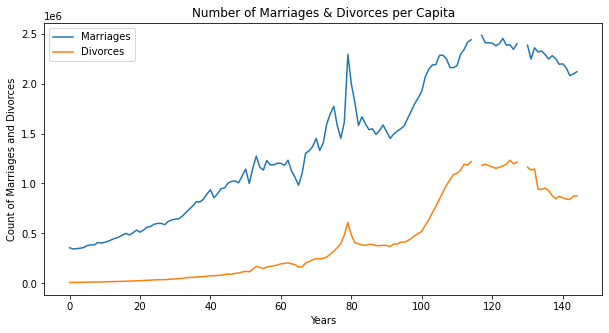

In [66]:
# get columns to plot
columns = marriages.columns.drop(['Population','Marriages_per_1000','Divorces_per_1000'])
# create x data
x_data = range(0, marriages.shape[0])
# create figure and axis
fig, ax = plt.subplots(figsize=(10,5))
# plot each column
for column in columns:
    ax.plot(x_data, marriages[column])
# set title and legend
ax.set_title('Number of Marriages & Divorces per Capita')
ax.legend(columns)
plt.xlabel('Years')
plt.ylabel('Count of Marriages and Divorces')

In [28]:
marriages.reset_index(inplace = True)
marriages

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


## Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!


In [29]:
df_years = marriages[(marriages.Year == 1900) | (marriages.Year == 1950) | (marriages.Year == 2000)]
columns_0 = df_years.drop(columns = ['Population','Marriages_per_1000','Divorces_per_1000'])
columns_1 = columns_0.set_index('Year')
columns_1

,Marriages,Divorces
Year,,
1900,709000.0,56000.0
1950,1667000.0,385000.0
2000,2315000.0,944000.0


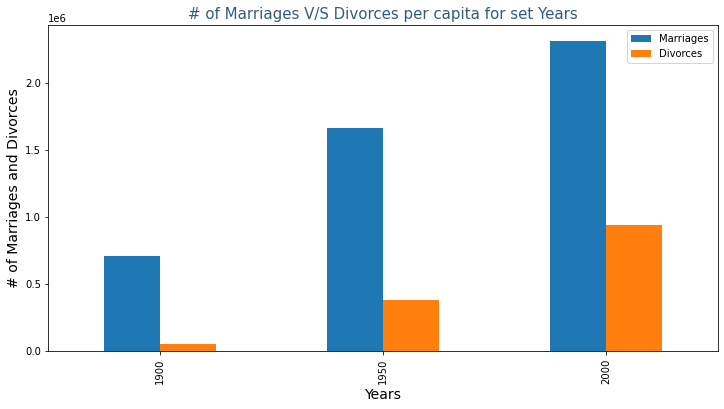

In [38]:
columns_1.plot.bar(figsize=(12,6))
plt.xlabel('Years', fontsize =14)
plt.ylabel('# of Marriages and Divorces', fontsize =14)
plt.title('# of Marriages V/S Divorces per capita for set Years',fontsize =15,color ='#355C7D')
plt.legend()
plt.show()

## Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
df_kills = pd.read_csv('actor_kill_counts.csv', index_col=0)
df_kills

,Count
Actor,
Arnold Schwarzenegger,369
Chow Yun-Fat,295
Clint Eastwood,207
Clive Owen,194
Dolph Lundgren,239
Jet Li,201
Nicolas Cage,204
Sylvester Stallone,267
Tomisaburo Wakayama,226


Text(0, 0.5, 'Actor Name')

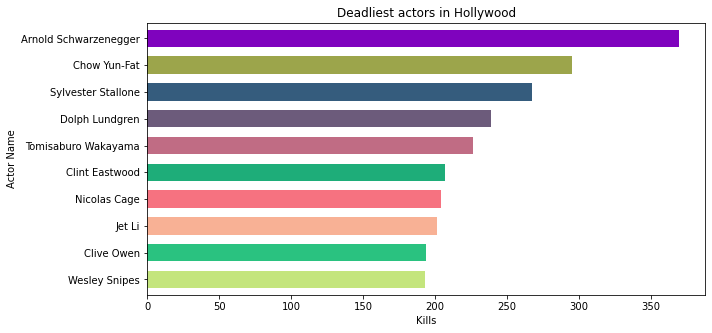

In [55]:
colours = ['#C4E57D','#2AC280','#F8B195','#F67280','#1EAD79','#C06C84','#6C5B7B','#355C7D','#9CA54B','#7F03BE']
df_kills['Count'].sort_values(ascending=True).plot.barh(color=colours, width = 0.65,figsize=(10,5))
plt.title("Deadliest actors in Hollywood")
plt.xlabel("Kills")
plt.ylabel("Actor Name")

## Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
emperors = pd.read_csv('roman-emperor-reigns.csv', index_col=0)
emperors

,Length_of_Reign,Cause_of_Death
Emperor,,
Augustus,40.58,Possibly assassinated
Tiberius,22.50,Possibly assassinated
Caligula,4.83,Assassinated
Claudius,13.75,Possibly assassinated
Nero,13.67,Suicide
...,...,...
Valentinian I,11.00,Natural causes
Valens,14.00,Killed in battle
Gratian,16.00,Assassinated


In [80]:
df_killtype = emperors.groupby(['Cause_of_Death']).count()
df_killtype

,Length_of_Reign
Cause_of_Death,
Assassinated,22
Died in captivity,1
Executed,3
Illness,5
Killed in battle,8
Natural causes,16
Possibly assassinated,8
Suicide,5


In [81]:
emperors.reset_index(inplace=True)
emperors

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [108]:
assassin = emperors[(emperors.Cause_of_Death == "Assassinated")]
emperor_names = assassin['Emperor'].values
assassin.describe()

,Length_of_Reign
count,22.000000
mean,6.238182
std,6.538846
min,0.160000
25%,0.602500
50%,3.500000
75%,13.000000
max,19.000000


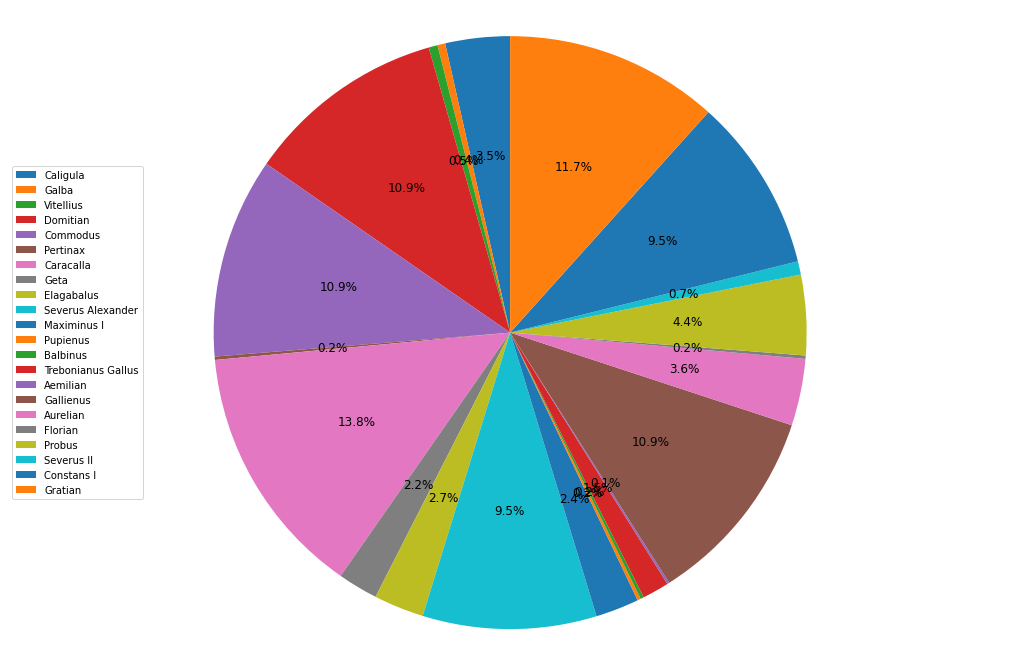

In [107]:
labels = assassin.Emperor
sizes = assassin.Length_of_Reign
fig, ax = plt.subplots(figsize=(18,12))
plt.pie(sizes, autopct='%1.1f%%', startangle=90, textprops={'fontsize':12})
plt.axis('equal')
plt.legend(labels, loc="center left", fontsize = 10)
plt.show()

## Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

arcade_revenue_cs_doctorates = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_revenue_cs_doctorates

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


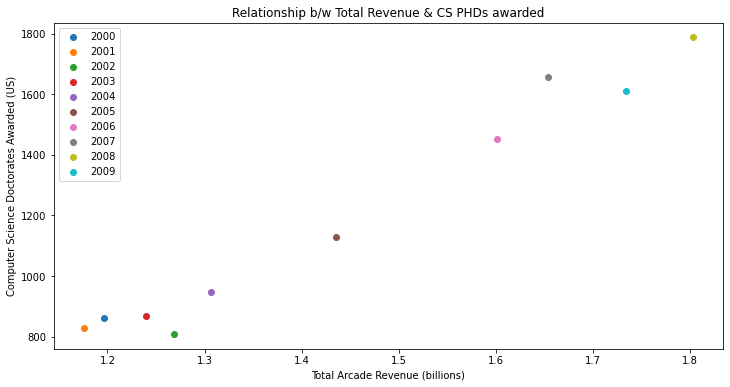

In [59]:
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots(figsize=(12,6))
# plot each data-point
for i in range(len(arcade_revenue_cs_doctorates['Total Arcade Revenue (billions)'])):
    ax.scatter(arcade_revenue_cs_doctorates['Total Arcade Revenue (billions)'][i], arcade_revenue_cs_doctorates['Computer Science Doctorates Awarded (US)'][i])
# set a title and labels
ax.set_title('Relationship b/w Total Revenue & CS PHDs awarded')
ax.set_xlabel('Total Arcade Revenue (billions)')
ax.set_ylabel('Computer Science Doctorates Awarded (US)')
ax.legend(arcade_revenue_cs_doctorates['Year'])